#### Import Libraries

In [1]:
# Import Standard Libraries
import pandas as pd
import numpy as np

# Import sklearn functions
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Import functions.py
from functions import *

#### Loading, Cleansing & Standardisng the Data

In [2]:
original_data = pd.read_csv('.\data\world_university_rankings_2016.csv',index_col='university_name')
original_data.head()

,world_rank,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international%,female%,male%
university_name,,,,,,,,,,,,,
California Institute of Technology,1,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,2243.0,6.9,27.0,33.0,67.0
University of Oxford,2,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,34.0,46.0,54.0
Stanford University,3,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,22.0,42.0,58.0
University of Cambridge,4,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,18812.0,11.8,34.0,46.0,54.0
Massachusetts Institute of Technology,5,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,11074.0,9.0,33.0,37.0,63.0


In [3]:
X = original_data[['teaching','international','research','citations','income','num_students','student_staff_ratio','international%','female%','male%']]
X.head()

,teaching,international,research,citations,income,num_students,student_staff_ratio,international%,female%,male%
university_name,,,,,,,,,,
California Institute of Technology,95.6,64.0,97.6,99.8,97.8,2243.0,6.9,27.0,33.0,67.0
University of Oxford,86.5,94.4,98.9,98.8,73.1,19919.0,11.6,34.0,46.0,54.0
Stanford University,92.5,76.3,96.2,99.9,63.3,15596.0,7.8,22.0,42.0,58.0
University of Cambridge,88.2,91.5,96.7,97.0,55.0,18812.0,11.8,34.0,46.0,54.0
Massachusetts Institute of Technology,89.4,84.0,88.6,99.7,95.4,11074.0,9.0,33.0,37.0,63.0


In [4]:
X = X.fillna(X.mean())

In [5]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 4.27456366,  0.65465542,  3.55897378, ...,  1.34850955,
        -1.44235777,  1.44235777],
       [ 3.66692605,  1.93865583,  3.62557194, ...,  2.008736  ,
        -0.30856882,  0.30856882],
       [ 4.06756624,  1.17416874,  3.48725268, ...,  0.87691922,
        -0.65742695,  0.65742695],
       ...,
       [-0.50640919, -1.36848995, -0.91847191, ..., -0.91512401,
         0.        ,  0.        ],
       [-0.76682531, -1.0643846 , -0.62134164, ..., -0.44353369,
        -1.87843044,  1.87843044],
       [-1.02724143, -1.30091099, -0.50351413, ..., -0.82080595,
        -0.57021242,  0.57021242]])

#### Performing a Hierarchical Clustering

In [8]:
# Create a hierarchical clustering model
hier_cluster = AgglomerativeClustering(metric='euclidean',linkage='ward',compute_full_tree=True)

In [9]:
# Fit the data to the model and determine which clusters each data point belongs to:
hier_cluster.set_params(n_clusters=3)
clusters = hier_cluster.fit_predict(X_scaled)

In [11]:
np.bincount(clusters)

array([555, 146,  99], dtype=int64)

In [12]:
# Read off 5 clusters:
hier_cluster.set_params(n_clusters=5)
clusters = hier_cluster.fit_predict(X_scaled)
np.bincount(clusters)

array([336,  50,  99, 146, 169], dtype=int64)

In [13]:
# Add cluster number to the original data
x_scaled_clustered = pd.DataFrame(X_scaled,columns=X.columns,index=X.index)
x_scaled_clustered['cluster'] = clusters

x_scaled_clustered.head()

,teaching,international,research,citations,income,num_students,student_staff_ratio,international%,female%,male%,cluster
university_name,,,,,,,,,,,
California Institute of Technology,4.274564,0.654655,3.558974,1.794039,2.536181,-0.976050,-0.980509,1.348510,-1.442358,1.442358,2
University of Oxford,3.666926,1.938656,3.625572,1.757041,1.306195,-0.188914,-0.603279,2.008736,-0.308569,0.308569,2
Stanford University,4.067566,1.174169,3.487253,1.797739,0.818185,-0.381423,-0.908273,0.876919,-0.657427,0.657427,2
University of Cambridge,3.780441,1.816169,3.512867,1.690445,0.404870,-0.238210,-0.587226,2.008736,-0.308569,0.308569,2
Massachusetts Institute of Technology,3.860569,1.499393,3.097910,1.790340,2.416668,-0.582793,-0.811959,1.914418,-1.093500,1.093500,2


#### Analysing the Results

In [14]:
# Find the size of the clusters
x_scaled_clustered['cluster'].value_counts()

0    336
4    169
3    146
2     99
1     50
Name: cluster, dtype: int64

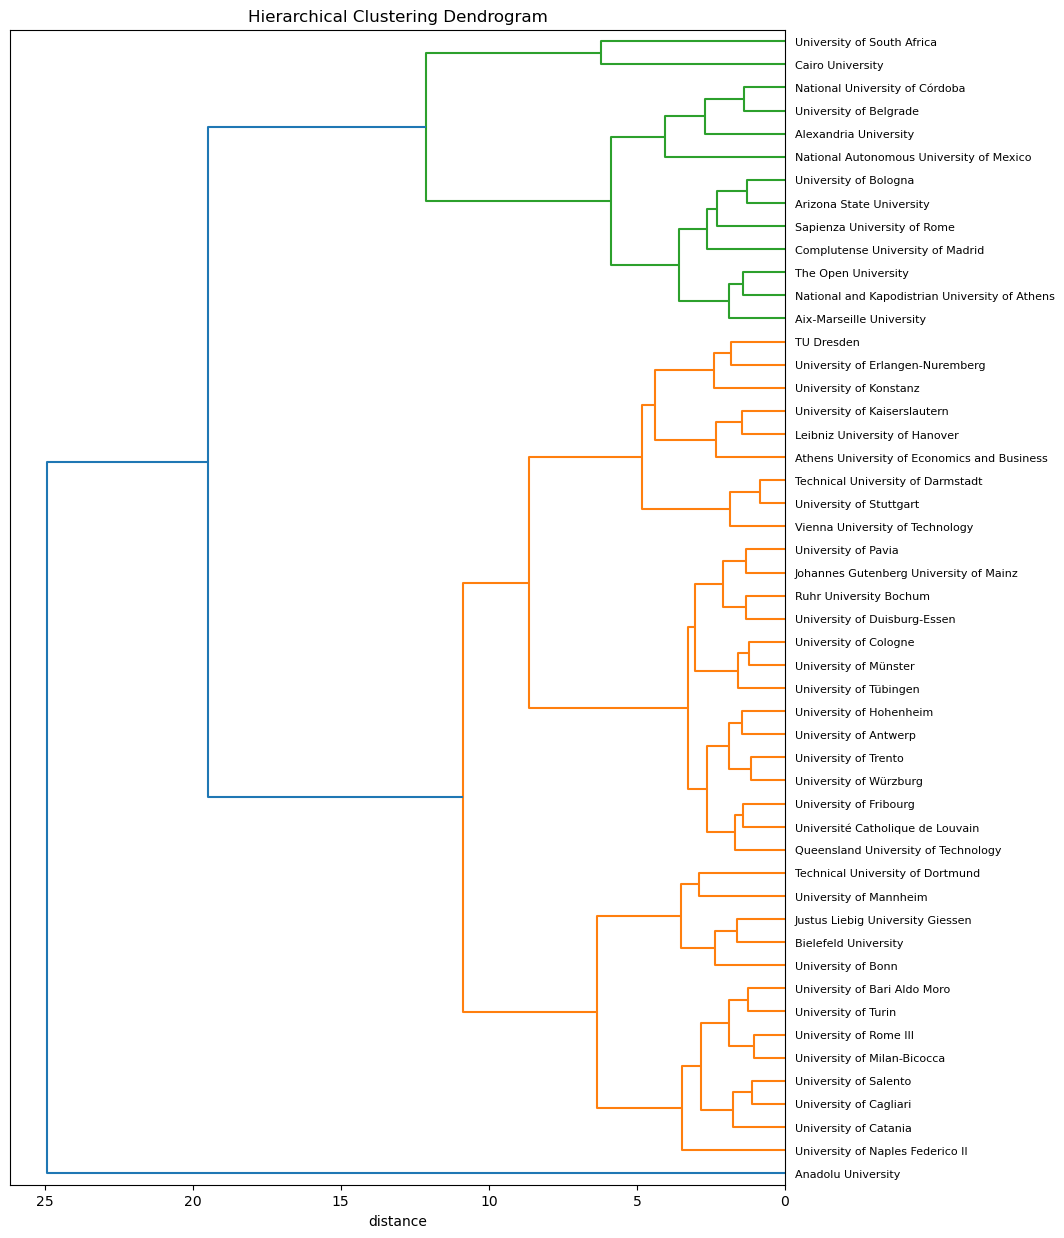

In [15]:
# Show the dendrogram for the first smallest cluster:
from scipy.cluster.hierarchy import linkage, fcluster
sample = x_scaled_clustered[x_scaled_clustered.cluster==1]
Z = linkage(sample,'ward')
names = sample.index
plot_dendrogram(Z, names, figsize=(10,15))

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_scaled)

x_reduced = pca.transform(X_scaled)

In [20]:
x_reduced_df = pd.DataFrame(x_reduced,index=X.index,columns=['PC1','PC2'])
x_reduced_df['cluster'] = clusters
x_reduced_df.head()

,PC1,PC2,cluster
university_name,,,
California Institute of Technology,5.555064,-3.811757,2
University of Oxford,5.977205,-1.462953,2
Stanford University,5.231170,-2.141250,2
University of Cambridge,5.735713,-1.242813,2
Massachusetts Institute of Technology,5.721362,-2.896713,2


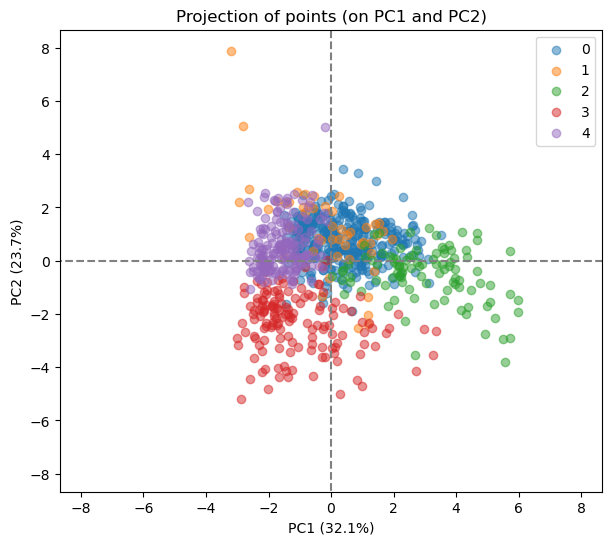

In [21]:
# Display the data points:
display_factorial_planes(x_reduced,2,pca,[(0,1)],illustrative_var=clusters,alpha=0.5)

#### Interpreting the Meaning of the Clusters
##### Parallel Coordinates Plot

Produce a parallel coordinates plot of all data points:

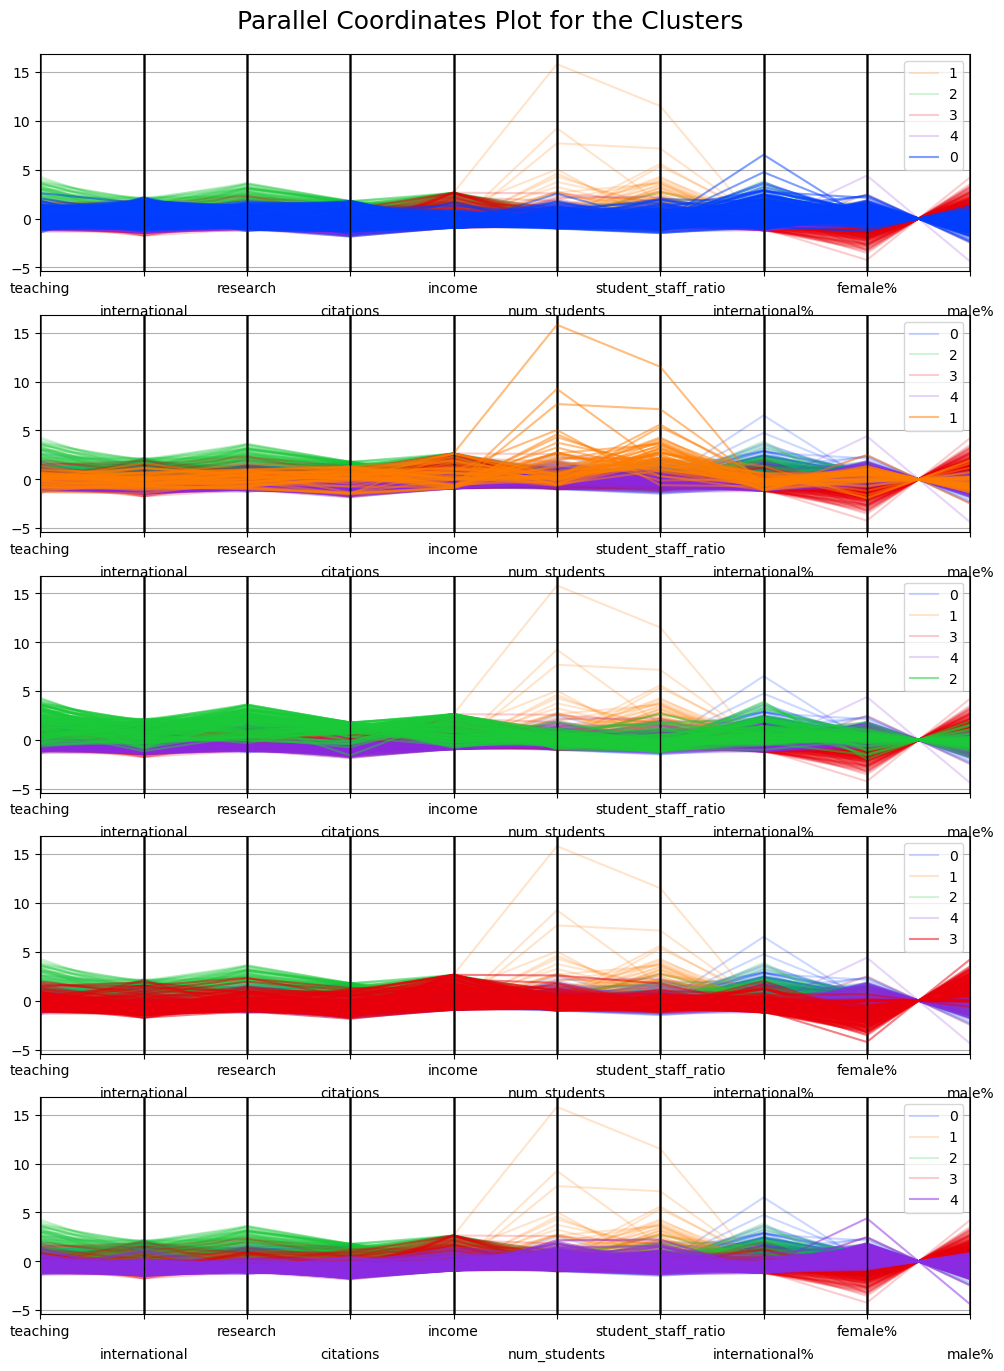

In [22]:
# Add cluster to the original data
x_clustered = pd.DataFrame(X_scaled,index=X.index,columns=X.columns)
x_clustered['cluster'] = clusters

# Display parallel coordinates polt
display_parallel_coordinates(x_clustered,5)

In [23]:
# Compute centroid (mean) for each cluster:
means = x_clustered.groupby(by='cluster').mean()

In [24]:
means

,teaching,international,research,citations,income,num_students,student_staff_ratio,international%,female%,male%
cluster,,,,,,,,,,
0,-0.147324,0.484640,-0.121886,0.402950,-0.476358,-0.133173,-0.093263,0.382735,0.386610,-0.386610
1,-0.026976,-0.121067,0.068308,0.176637,0.499722,1.552371,2.528534,-0.309602,0.390086,-0.390086
2,1.733331,0.794762,1.866232,1.113502,1.180581,0.033604,-0.271841,0.787751,0.130750,-0.130750
3,-0.217409,-0.730742,-0.220840,-0.658037,0.623069,-0.299505,-0.291184,-0.466982,-1.563210,1.563210
4,-0.526678,-0.762004,-0.680331,-0.937197,-0.430623,0.044548,-0.151866,-0.727378,0.389818,-0.389818


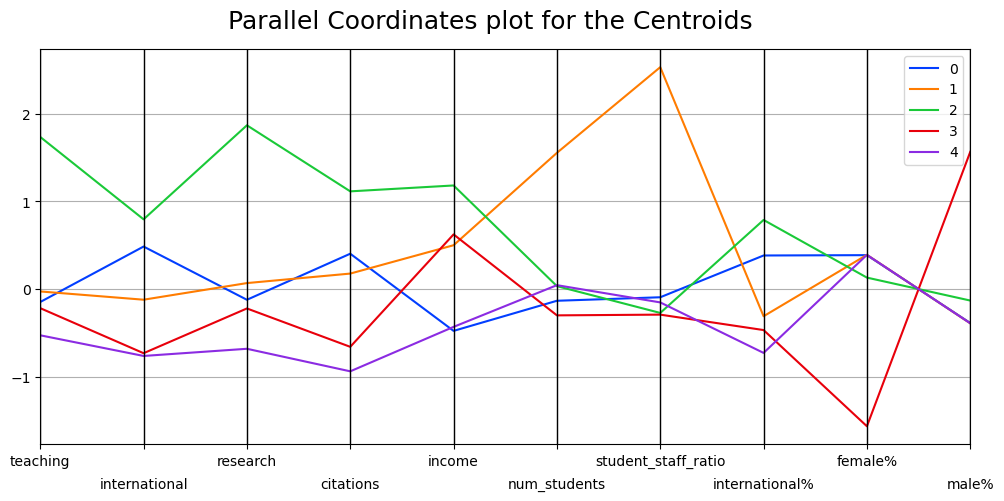

In [25]:
display_parallel_coordinates_centroids(means.reset_index(),5)

array([[<Axes: title={'center': 'citations'}, xlabel='[cluster]'>,
        <Axes: title={'center': 'female%'}, xlabel='[cluster]'>,
        <Axes: title={'center': 'income'}, xlabel='[cluster]'>,
        <Axes: title={'center': 'international'}, xlabel='[cluster]'>,
        <Axes: title={'center': 'international%'}, xlabel='[cluster]'>],
       [<Axes: title={'center': 'male%'}, xlabel='[cluster]'>,
        <Axes: title={'center': 'num_students'}, xlabel='[cluster]'>,
        <Axes: title={'center': 'research'}, xlabel='[cluster]'>,
        <Axes: title={'center': 'student_staff_ratio'}, xlabel='[cluster]'>,
        <Axes: title={'center': 'teaching'}, xlabel='[cluster]'>]],
      dtype=object)

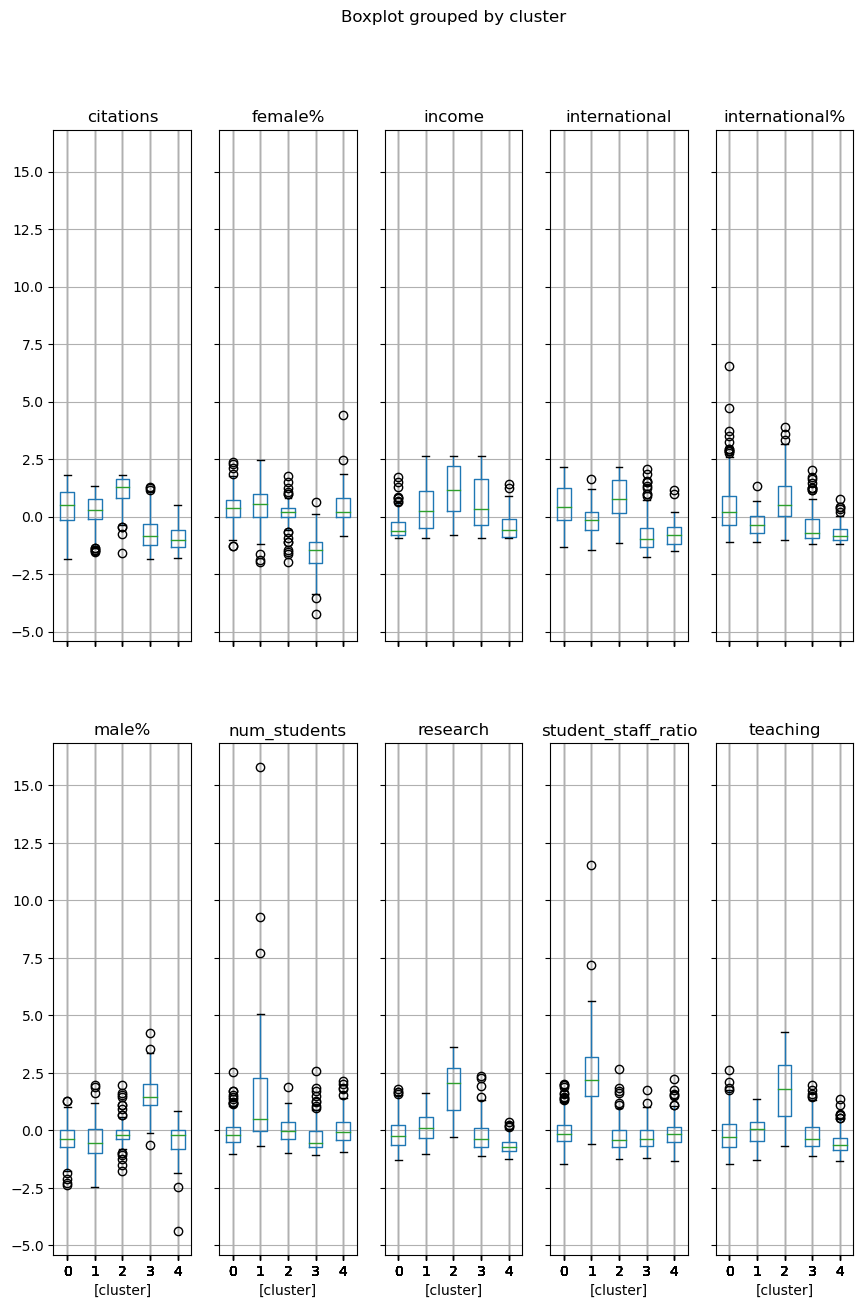

In [26]:
# Produce boxplots for each variable within each cluster:
x_clustered.boxplot(by='cluster',figsize=(10,15),layout=(2,5))